## Feature Engineering
<ol style="font-size: 20px; line-height: 1.2; padding-left: 0; margin-top: 0;">
  <li>Feature Transformation</li>
  <ol style="font-size: 20px; line-height: 1.2; padding-left: 1; margin-top: 0;">
    <li>Missing value imputation</li>
    <li>Handling Categorical Features</li>
    <li>Outlier Detection</li>
    <li>Feature Scaling</li></ol>
  <li>Feature Construction</li>
  <li>Feature Selection</li>
  <li>Feature Extraction</li>
</ol>


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Feature Scaling

In [65]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\codes\python\Learn_ML\Datasets\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### 1. Standardization

#### geometrically everytime we perform standardization we are doing two things
 <ol style="font-size: 20px; line-height: 1.1; padding-left:0.5;">
    <li>Mean Centering(mean becomes 0)</li>
    <li>Scaling by factor of Standard deviation(std becomes 1)</li>
</ol>

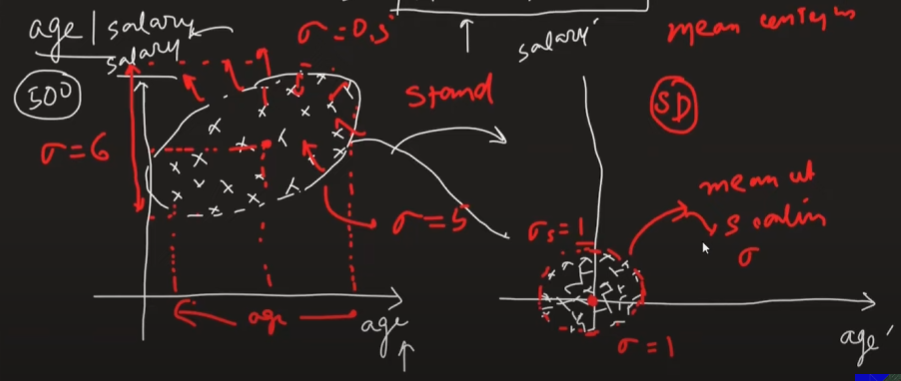

In [66]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [67]:
df = df.iloc[:,2:]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting means converting it to mean = 0 and std = 1
scaler.fit(X_train)

#transformation is done on both X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [84]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [73]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [85]:
## after scaling mean changes to 0 and std to 1
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#### Effect of Scaling

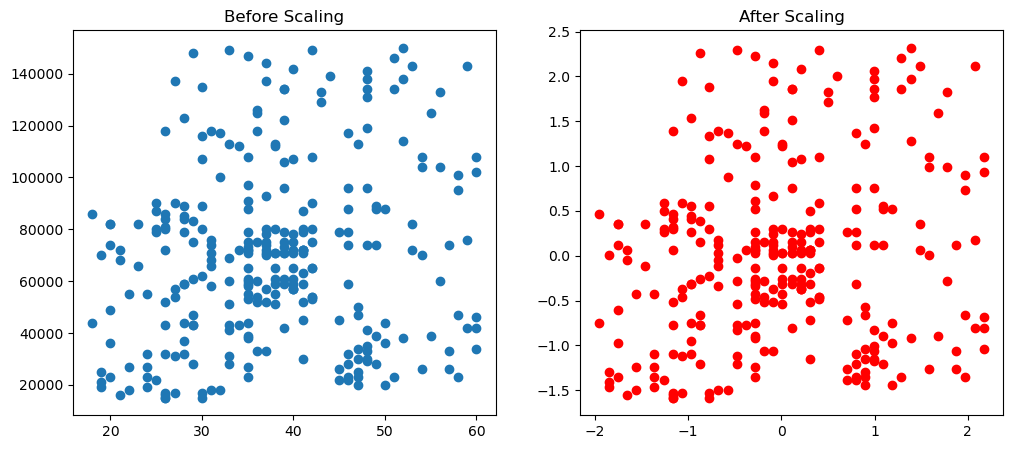

In [86]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

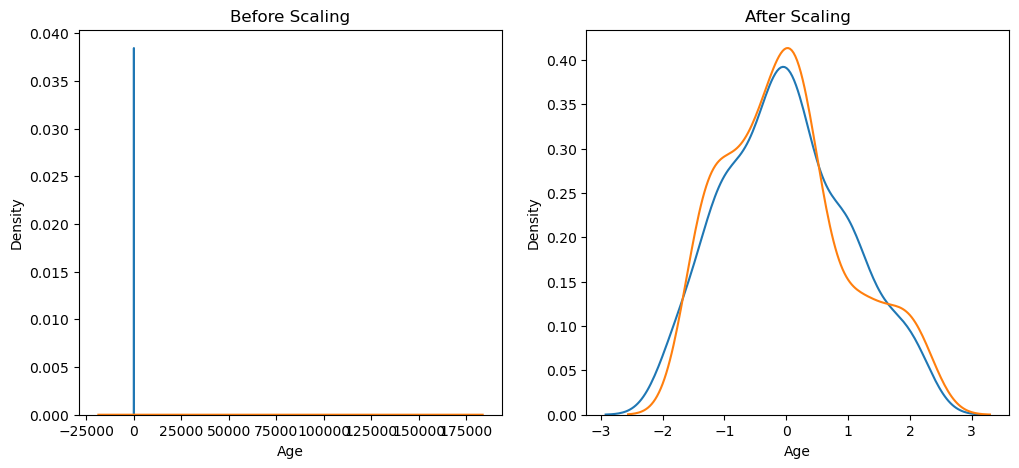

In [87]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

#after Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)


##### Scaling does change the mean and std but the overall shape remains same and also the effect of outlier still remains , Scaling does not necessarily change the inmpact of outliers on the dataset. In case of certian ml algorithms scaling does impact the accuracy of the model for eg in linear regression scaling effect the accuracy score